<a href="https://colab.research.google.com/github/bimal-bp/Customer-Segmentation--Data-Analysis.ipynb/blob/ML_MODELS/Customer_Segmentation_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import date
%matplotlib inline
plt.style.use('ggplot')

In [29]:
trans=pd.read_csv('/content/drive/MyDrive/Transactions_Cleaned.csv')
cust=pd.read_csv('/content/drive/MyDrive/CustomerDemographic_Cleaned.csv')

In [30]:
trans.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82


In [31]:
# shape
trans.shape

(19803, 14)

- The trans dataset have 19803 rows and 14 columns

In [32]:
cust.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,67
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,40
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,67
3,4,Talbot,None,Male,33,1961-10-03,Missing,IT,Mass Customer,N,No,7.0,59
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Missing,Affluent Customer,N,Yes,8.0,44


In [33]:
cust.shape

(3912, 13)

- The cust dataset have 3912 rows and 13 columns

In [34]:
# merging two dataset
final=pd.merge(trans,cust,on='customer_id',how='inner')
final.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,66
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,66
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,66
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,42
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,42


In [35]:
final.shape

(19354, 26)

- The final dataset have 19354 rows and 26 columns

In [36]:
# adding all nullvalues in finaldataset
final.isnull().sum().sum()

0

In [37]:
# checking duplicates
final.duplicated().sum()

0

- The final dataset have no null values.
- There is no duplicates values in the datset.

In [38]:
# Checking numerical and categorical variable
numerical_var = final.select_dtypes(include=['int64', 'float64'])
categorial_var = final.select_dtypes(include=['object'])

print('The numerical var are:')
print(numerical_var.columns)

print('-------------*******************---------------')

print('The categorical var are:')
print(categorial_var.columns)


The numerical var are:
Index(['transaction_id', 'product_id', 'customer_id', 'online_order',
       'list_price', 'standard_cost', 'product_first_sold_date', 'Profit',
       'past_3_years_bike_related_purchases', 'tenure', 'Age'],
      dtype='object')
-------------*******************---------------
The categorical var are:
Index(['transaction_date', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'first_name', 'last_name', 'gender',
       'DOB', 'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car'],
      dtype='object')


In [39]:
# checkig the dtypes of var
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19354 entries, 0 to 19353
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19354 non-null  int64  
 1   product_id                           19354 non-null  int64  
 2   customer_id                          19354 non-null  int64  
 3   transaction_date                     19354 non-null  object 
 4   online_order                         19354 non-null  float64
 5   order_status                         19354 non-null  object 
 6   brand                                19354 non-null  object 
 7   product_line                         19354 non-null  object 
 8   product_class                        19354 non-null  object 
 9   product_size                         19354 non-null  object 
 10  list_price                           19354 non-null  float64
 11  standard_cost               

In [40]:
# the Transiction date has object dtype change it to datetime

final['transaction_date']=pd.to_datetime(final['transaction_date'])

In [41]:
# checking statics
round(final.describe(),2)

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date,Profit,past_3_years_bike_related_purchases,tenure,Age
count,19354.00,19354.00,19354.00,19354.00,19354.00,19354.00,19354.00,19354.00,19354.00,19354.00,19354.00
mean,9990.83,45.80,1738.38,0.51,1106.50,555.73,38203.33,550.77,48.95,10.68,43.24
std,5773.16,30.56,1011.09,0.50,582.81,405.73,2873.92,492.94,28.63,5.67,12.62
min,1.00,0.00,1.00,0.00,12.01,7.21,33259.00,4.80,0.00,1.00,19.00
25%,4996.25,18.00,856.25,0.00,575.27,215.14,35667.00,133.78,24.00,6.00,34.00
50%,9988.50,45.00,1735.00,1.00,1163.89,507.58,38216.00,445.21,48.00,11.00,43.00
75%,14988.75,72.00,2614.00,1.00,1635.30,795.10,40672.00,827.16,73.00,15.00,53.00
max,20000.00,100.00,3500.00,1.00,2091.47,1759.85,42710.00,1702.55,99.00,22.00,89.00


RFM ANALYSIS

RFM is a behaviour based approach grouping customers into segments. It groups the customers on the basis of their previous purches transactions.How recently ,how often and hoe much did a customer buy.

- Recency(R): who have purchased recently? Number of days since last purches(last recency)
- Frequency(F): Who has purchased frequently? It means the total number of purchases(High Frequency)
- Monetary Value(M): Who have high purchase amount?it means the total money customer spent(high monetary value)

In [42]:
# Maximum Transaction Date or the latest transaction date.
max_trans_date=max(final['transaction_date']).date()
max_trans_date

datetime.date(2017, 12, 30)

In [43]:
# Taking the last transaction date as a reference date for comparision and
# finding the number of days between a transaction date and last transaction date to compute the recency.
from datetime import datetime
comparison_date=datetime.strptime(str(max_trans_date),"%Y-%m-%d")
print(comparison_date)

2017-12-30 00:00:00


In [44]:
import pandas as pd

# Assuming comparison_date is the maximum transaction date


# Creating a RFM table
rfm_table = final.groupby(['customer_id']).agg({
    'transaction_date': lambda date: (comparison_date - date.max()).days,
    'product_id': lambda prod_id: len(prod_id),
    'Profit': lambda p: sum(p)
})

# Renaming columns
rfm_table.rename(columns={'transaction_date': 'recency', 'product_id': 'frequency', 'Profit': 'monetary'}, inplace=True)

# Dividing the recency, frequency, and monetary into 4 quartiles
rfm_table['r_quartile'] = pd.qcut(rfm_table['recency'], 4, labels=['4', '3', '2', '1'])
rfm_table['f_quartile'] = pd.qcut(rfm_table['frequency'], 4, labels=['1', '2', '3', '4'])
rfm_table['m_quartile'] = pd.qcut(rfm_table['monetary'], 4, labels=['1', '2', '3', '4'])


In [45]:
rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
customer_id,,,,,,
1,7,11,3018.09,4,4,3
2,128,3,2226.26,1,1,2
3,102,8,3362.81,1,4,3
4,195,2,220.57,1,1,1
5,16,6,2394.94,4,2,2
...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2
3497,52,3,1648.32,2,1,1
3498,127,6,3147.33,1,2,3


In [46]:
# calculating rfm score
# max weighage is given to recency then frequency then monetary
rfm_table['rfm_score']=100*rfm_table['r_quartile'].astype(int) + 10*rfm_table['f_quartile'].astype(int) + rfm_table['monetary']

In [47]:
rfm_table.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score
customer_id,,,,,,,
1,7,11,3018.09,4,4,3,3458.09
2,128,3,2226.26,1,1,2,2336.26
3,102,8,3362.81,1,4,3,3502.81
4,195,2,220.57,1,1,1,330.57
5,16,6,2394.94,4,2,2,2814.94


In [48]:
rfm_table['customer_title']=pd.qcut(rfm_table['rfm_score'],4,['Bronze','Silver','Gold','Platinum'])

In [49]:
rfm_table.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
customer_id,,,,,,,,
1,7,11,3018.09,4,4,3,3458.09,Gold
2,128,3,2226.26,1,1,2,2336.26,Silver
3,102,8,3362.81,1,4,3,3502.81,Gold
4,195,2,220.57,1,1,1,330.57,Bronze
5,16,6,2394.94,4,2,2,2814.94,Silver


**Merging both RFM Table with Transaction and Customer Tables**

- The RFM_Table dataframe is merged with the Transactions and Customer Demographics datasets, to gain depper insights of Customer Segemnts along with transactions. The dataframes are joined based on customer_ids from both the datasets

In [50]:
cust_trans_rfm = pd.merge(final,rfm_table,on='customer_id',how='inner')
cust_trans_rfm.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,tenure,Age,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,10.0,66,75,3,645.99,2,1,1,855.99,Bronze
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,10.0,66,75,3,645.99,2,1,1,855.99,Bronze
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,10.0,66,75,3,645.99,2,1,1,855.99,Bronze
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,10.0,42,20,7,4179.11,3,3,4,4509.11,Platinum
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,10.0,42,20,7,4179.11,3,3,4,4509.11,Platinum


In [51]:
cust_trans_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19354 entries, 0 to 19353
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19354 non-null  int64         
 1   product_id                           19354 non-null  int64         
 2   customer_id                          19354 non-null  int64         
 3   transaction_date                     19354 non-null  datetime64[ns]
 4   online_order                         19354 non-null  float64       
 5   order_status                         19354 non-null  object        
 6   brand                                19354 non-null  object        
 7   product_line                         19354 non-null  object        
 8   product_class                        19354 non-null  object        
 9   product_size                         19354 non-null  object        
 10  list_price

In [52]:
cust_trans_rfm['Age_Group']=cust_trans_rfm['Age'].apply(lambda x: (math.floor(x/10)+1)*10)

**Creating a Detail Customer title / tag based on RFM Score**

- An extended version of customer title is made which divides the entire number of customers into 11 groups. The groups are mainly Platinum Customers, Very Loyal, Becoming Loyal, Recent Customers, Potential Customers, Late Bloomer, Loosing Customers, High Risk Customers, Almost Lost Customers, Evasive Customers and Lost Customers.

- The demarkation of customers into the above mentioned groups is based on their RFM scores.

In [53]:
# Function as a lookup to appropiate customer titles based on RFM score.

def cust_score_title_lkup(cols):

    rfm_score = cols[0]

    if rfm_score >= 444:
        return 'Platinum Customer'
    elif rfm_score >=433 and rfm_score < 444:
        return 'Very Loyal'
    elif rfm_score >=421 and rfm_score < 433:
        return 'Becoming Loyal'
    elif rfm_score >=344 and rfm_score < 421:
        return 'Recent Customer'
    elif rfm_score >=323 and rfm_score < 344:
        return 'Potential Customer'
    elif rfm_score >=311 and rfm_score < 323:
        return 'Late Bloomer'
    elif rfm_score >=224 and rfm_score < 311:
        return 'Loosing Customer'
    elif rfm_score >=212 and rfm_score < 224:
        return 'High Risk Customer'
    elif rfm_score >=124 and rfm_score < 212:
        return 'Almost Lost Customer'
    elif rfm_score >=112 and rfm_score < 124:
        return 'Evasive Customer'
    else :
        return 'Lost Customer'

In [54]:
cust_trans_rfm['details_cust_title']=cust_trans_rfm[['rfm_score']].apply(cust_score_title_lkup, axis=1)

In [55]:
# Function to provide ranks to the customers based on their title.

def get_rank(cols):

    title = cols[0]

    if title=='Platinum Customer':
        return 1
    elif title=='Very Loyal':
        return 2
    elif title == 'Becoming Loyal':
        return 3
    elif title == 'Recent Customer':
        return 4
    elif title=='Potential Customer':
        return 5
    elif title == 'Late Bloomer':
        return 6
    elif title == 'Loosing Customer':
        return 7
    elif title=='High Risk Customer':
        return 8
    elif title == 'Almost Lost Customer':
        return 9
    elif title == 'Evasive Customer':
        return 10
    else :
        return 11

In [56]:
# ranking
cust_trans_rfm['rank']=cust_trans_rfm[['details_cust_title']].apply(get_rank, axis=1)

After performing data quality assessment(DQA), data cleaning and RFM Analysis on the dataset, it's time to export the dataset to a csv file for further exploratory data analysis (EDA) and this data will drive the Sales Customer Segmenation Dashboard developed in Tableau.

In [57]:
cust_trans_rfm.to_csv('customer_trans_RFM_Analysis.csv',index=False)

In [58]:

print("Total records in final dataset : {}".format(cust_trans_rfm.shape[0]))

Total records in final dataset : 19354


# **Data Analysis and Exploration**

In [59]:
new_cust=pd.read_csv('/content/drive/MyDrive/NewCustomerList_Cleaned.csv')
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age Group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,63,70
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,51,60
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,46,50
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,42,50
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,55,60


<ipython-input-60-9f7a09ff86e2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_cust['Age Group'],kde=False,bins=15)


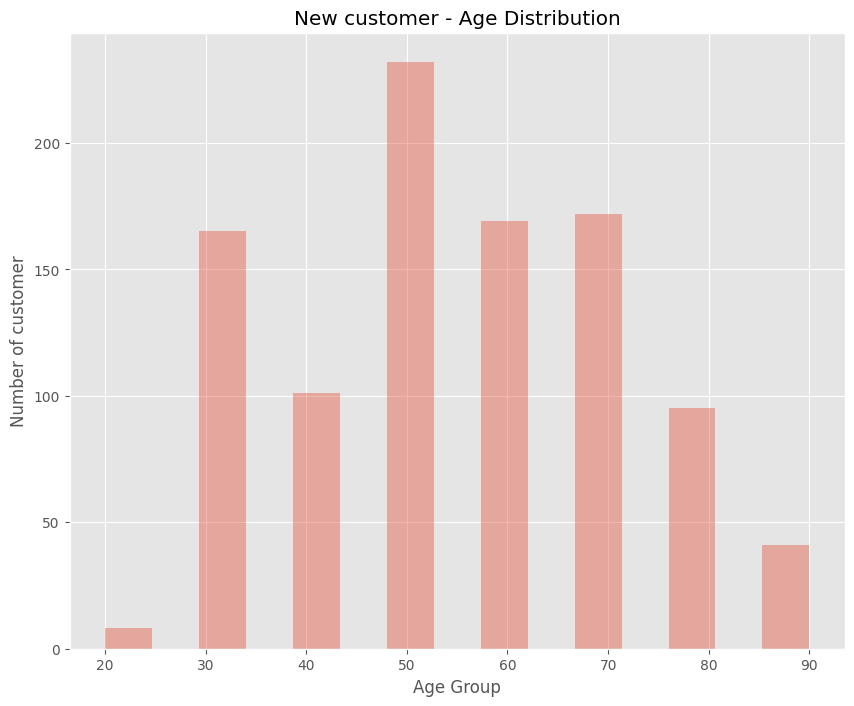

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.distplot(new_cust['Age Group'],kde=False,bins=15)
plt.xlabel('Age Group')
plt.ylabel('Number of customer')
plt.title('New customer - Age Distribution')
plt.show()

<ipython-input-61-662a0b61861b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cust_trans_rfm['Age_Group'],kde=False,bins=15)


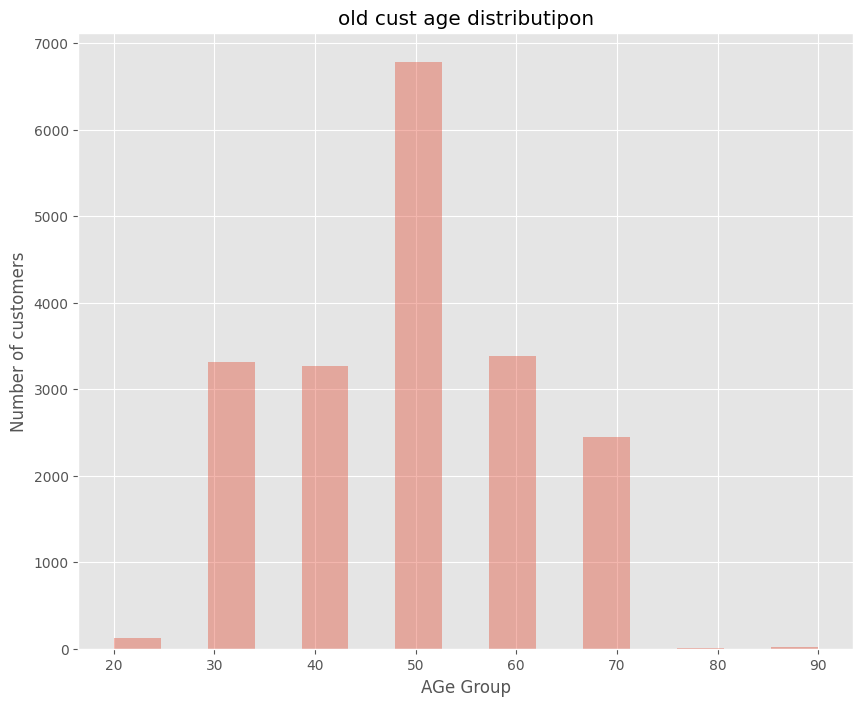

In [61]:
plt.figure(figsize=(10,8))
sns.distplot(cust_trans_rfm['Age_Group'],kde=False,bins=15)
plt.xlabel('AGe Group')
plt.ylabel('Number of customers')
plt.title('old cust age distributipon')
plt.show()

Bike Related Purchases over last 3 year

In [62]:
cust_bike_purchase_by_gender = cust_trans_rfm.groupby('gender').agg({'past_3_years_bike_related_purchases' : sum}
                                                                 ).reset_index()

In [63]:
total_records = cust_trans_rfm['past_3_years_bike_related_purchases'].sum()

In [64]:
# calculating pecentage
cust_bike_purchase_by_gender['Percent_of_total'] = (cust_bike_purchase_by_gender['past_3_years_bike_related_purchases']
                                                        /total_records)*100

In [65]:
# value counts
cust_bike_purchase_by_gender

,gender,past_3_years_bike_related_purchases,Percent_of_total
0,Female,478488,50.503731
1,Male,468943,49.496269


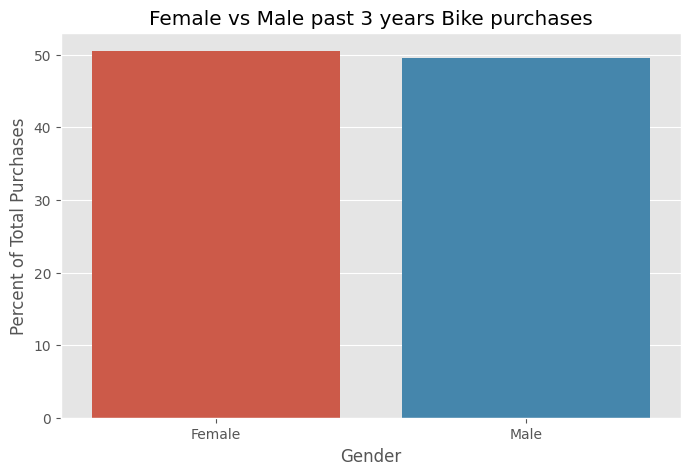

In [66]:
plt.figure(figsize=(8,5))
sns.barplot(x='gender',y='Percent_of_total',data=cust_bike_purchase_by_gender)
plt.xlabel('Gender')
plt.ylabel('Percent of Total Purchases')
plt.title('Female vs Male past 3 years Bike purchases')

plt.show()

# **RFM ANALYSIS SCATTER PLOTS**

<Figure size 800x700 with 0 Axes>

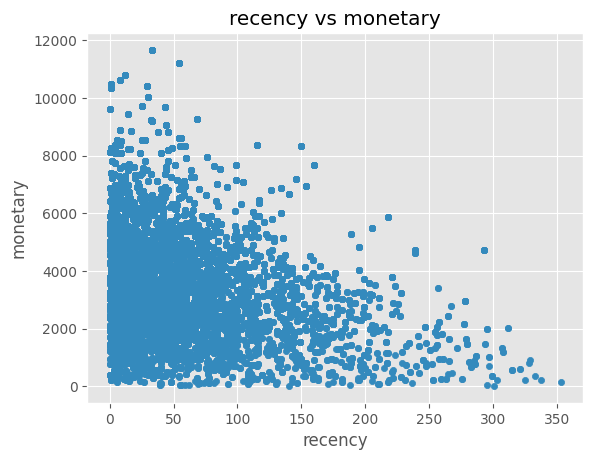

In [67]:
plt.figure(figsize=(8,7))
cust_trans_rfm.plot.scatter(x='recency',y='monetary')
plt.xlabel('recency')
plt.ylabel('monetary')
plt.title('recency vs monetary')
plt.show()

- The chart shows that customers who purchased recently generated more revenue than customers who visited long time ago. Customers from recent past (50-100) days generated a moderate revenue. Customers who visited 200 days ago generated a low revenue.

<Figure size 800x700 with 0 Axes>

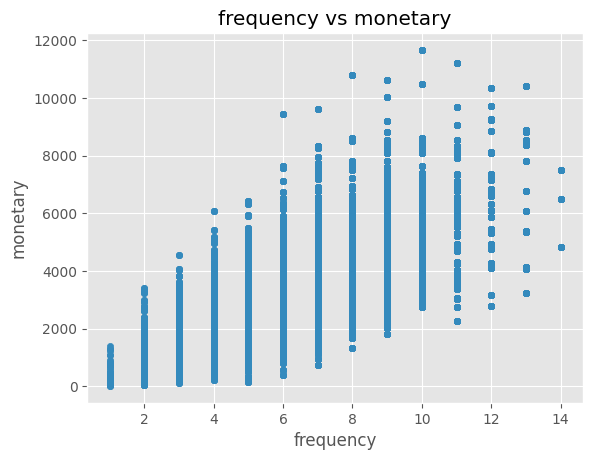

In [68]:
# frequency vs monetary
plt.figure(figsize=(8,7))
cust_trans_rfm.plot.scatter(x='frequency',y='monetary')
plt.xlabel('frequency')
plt.ylabel('monetary')
plt.title('frequency vs monetary')
plt.show()

- Customers classified as "Platinum Custoers" , "Very Loyal" and "Becoming Loyal" visit frequently, which correlated with increased revenue for the business.

# **5. Customer Segment Distribution**


In [74]:
# Calculating the number of unique customers under a customer title.

cust_per_title = cust_trans_rfm[['details_cust_title', 'customer_id','rank']].drop_duplicates().groupby(
    ['details_cust_title','rank']).size().reset_index().sort_values('rank')
cust_per_title.rename(columns={0:'Number of Customers'},inplace=True)
cust_per_title

,details_cust_title,rank,Number of Customers
3,Platinum Customer,1,3347
6,Very Loyal,2,4
5,Recent Customer,4,23
4,Potential Customer,5,9
1,Late Bloomer,6,4
2,Loosing Customer,7,19
0,Almost Lost Customer,9,10


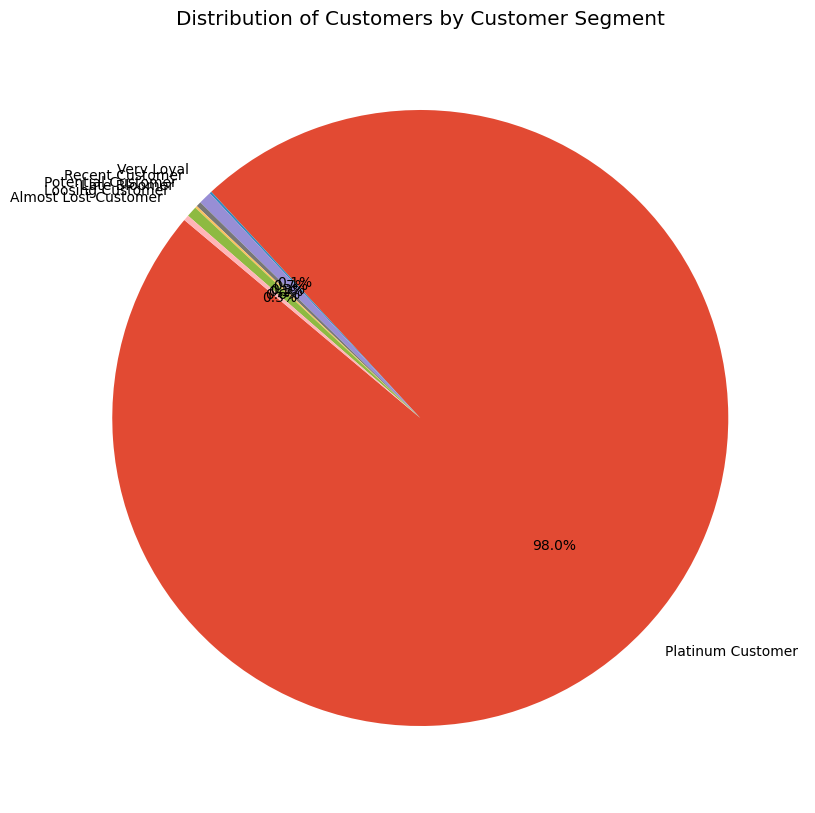

In [76]:
# plotting the number of customers

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming cust_per_title is your DataFrame
plt.figure(figsize=(10, 10))
plt.pie(cust_per_title['Number of Customers'], labels=cust_per_title['details_cust_title'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customers by Customer Segment')
plt.show()
